In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from keras import backend as K

In [2]:
(x_train, y_train),(x_val, y_val) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000, 10)

In [4]:
x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train)

In [10]:
x_val = x_train.astype('float32') / 255
y_val = to_categorical(y_val)

In [61]:
model = tf.keras.Sequential([
                             Flatten(input_shape=(28, 28)),
                             Dense(128, activation='sigmoid'),
                             Dense(64, activation='relu'),
                             Dense(10, activation='softmax')
])

In [62]:
model.compile(optimizer='SGD', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
type(x_val)

numpy.ndarray

In [64]:
K.set_value(model.optimizer.learning_rate, 0.01)

In [65]:
history = model.fit(x_train, y_train,batch_size=128, epochs=50)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4411 - accuracy: 0.1600
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3170 - accuracy: 0.3149
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3115 - accuracy: 0.3997
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3063 - accuracy: 0.4855
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3007 - accuracy: 0.5441
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2948 - accuracy: 0.5854
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2881 - accuracy: 0.6113
Epoch 8/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2805 - accuracy: 0.6466
Epoch 9/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2726 - accuracy: 0.6652
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2646 - accuracy: 0.6802

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

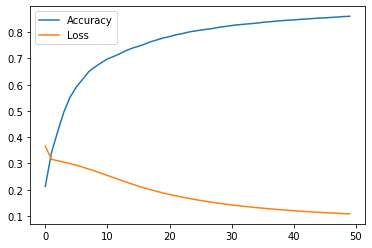

In [67]:
import matplotlib.pyplot as plt

#plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['loss'], label="Loss")

plt.legend()
plt.show()
